https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### Importing libraries

In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
from iso3166 import countries

### Loading data

In [125]:
df = pd.read_csv("ds_salaries.csv")

In [126]:
#Dropping some columns, it will be considered only the salary in USD
cols = [0,5,6]
df.drop(df.columns[cols],axis = 1,inplace = True)

In [127]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M


In [128]:
#Replacing some of the values to understand the graphs clearly
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df.employment_type.replace(['PT','FT','CT','FL'], ['Part-time','Full-time','Contract','Freelance'], inplace = True)

In [129]:
df.shape

(607, 9)

In [130]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [131]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [132]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [133]:
df["salary_in_usd"].describe().round(2)

count       607.00
mean     112297.87
std       70957.26
min        2859.00
25%       62726.00
50%      101570.00
75%      150000.00
max      600000.00
Name: salary_in_usd, dtype: float64

In [134]:
# x = (list(df['work_year'].unique()))
# y = df.groupby(by ="company_size").size()
# plt.bar(x,y,color = 'lightblue')
# plt.ylabel("Company Size")
# plt.xlabel("Year")

# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.show()
# print(y)

### Data Analysis

______________
Salary Distribution
______________

In [135]:
fig =  px.histogram(
    data_frame=df,
    x="salary_in_usd",
    nbins=60,
    labels = {"salary_in_usd": "Salary in USD"},
    # marginal="box",
    title = "Salary(in USD) distribution",
).update_traces(marker=dict(color='turquoise'))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"


fig.show()

Here we can notice that the most part of salaries is around 100k, and there are some outliers above 300k.

In [136]:
#Checking who are these outliers
df.loc[df["salary_in_usd"] >= 300000].sort_values(by ="salary_in_usd", ascending = False)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,Executive,Full-time,Principal Data Engineer,600000,US,Remote,US,L
33,2020,Mid,Full-time,Research Scientist,450000,US,On-site,US,M
97,2021,Mid,Full-time,Financial Data Analyst,450000,US,Remote,US,L
157,2021,Mid,Full-time,Applied Machine Learning Scientist,423000,US,Hybrid,US,L
225,2021,Executive,Contract,Principal Data Scientist,416000,US,Remote,US,S
63,2020,Senior,Full-time,Data Scientist,412000,US,Remote,US,L
523,2022,Senior,Full-time,Data Analytics Lead,405000,US,Remote,US,L
519,2022,Senior,Full-time,Applied Data Scientist,380000,US,Remote,US,L
25,2020,Executive,Full-time,Director of Data Science,325000,US,Remote,US,L
482,2022,Executive,Full-time,Data Engineer,324000,US,Remote,US,M


In [137]:
fig = px.histogram(
    data_frame=df,
    x="salary_in_usd",
    color="work_year",
    labels = {"salary_in_usd": "Salary in USD", "work_year": "Year"},
    nbins=60, # 10 width per each bin since range is from 0-600k
    title = "Salary(in USD) distribution - year",
)

for i in range(3):
    fig.data[i].marker.line.width = 1
    fig.data[i].marker.line.color = "black"

fig.show()

In [138]:
df.groupby("work_year")["salary_in_usd"].mean().reset_index(name="mean").round(2)

,work_year,mean
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


* The distribution of ranges has changed, in 2022 most part of values is concentrated in higher salaries;
* The mean shows that 2020 and 2021 were close in general, but 2022 had an increase


________________
Employment Type and Salary
___________

In [139]:
px.box(
    data_frame=df,
    x="salary_in_usd",
    y="employment_type",
    labels = {"employment_type": "Employment Type", "salary_in_usd": "Salary in USD"},
    color="employment_type",
    title = "Employment Type Vs Salary",
)

____________
Experience vs Salary
____________

In [140]:
px.box(
    data_frame=df,
    x="salary_in_usd",
    y="experience_level",
    labels = {"experience_level": "Experience Level", "salary_in_usd": "Salary in USD"},
    color="experience_level",
    title = "Experience Vs Salary",
)

In [141]:
px.box(
    data_frame=df,
    x="salary_in_usd",
    y="remote_ratio",
    labels = {"remote_ratio": "Work Model", "salary_in_usd": "Salary in USD"},
    color="remote_ratio",
    title = "Experience Vs Salary",
)

In [142]:
px.histogram(df, 
            x = 'work_year',color = 'remote_ratio', 
            barmode = 'group',
            color_discrete_sequence=px.colors.qualitative.Vivid,
            template ='plotly_white',
            title='Count of Work Model', 
            labels={"work_year":"Year", "remote_ratio":"Work Model"})

____________
Job Titles
_______

<AxesSubplot:>

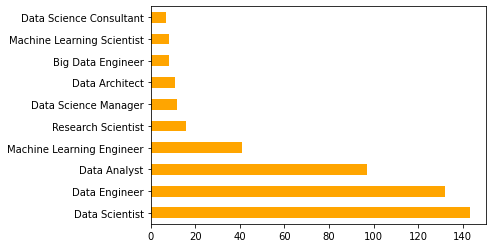

In [143]:
df['job_title'].value_counts().head(10).plot(kind='barh',color='orange')

In [144]:
df_2 = df.groupby(['job_title','experience_level','work_year']).agg({'salary_in_usd':'mean'}).round(2).sort_values(by='salary_in_usd',ascending=False).reset_index()
df_2.pivot_table(columns = ['work_year','experience_level'], index = 'job_title', values = 'salary_in_usd', fill_value="-", margins=True).round(2)


work_year                                    2020                              \
experience_level                            Entry Executive      Mid   Senior   
job_title                                                                       
3D Computer Vision Researcher                   -         -        -        -   
AI Scientist                                45896         -        -        -   
Analytics Engineer                              -         -        -        -   
Applied Data Scientist                          -         -        -        -   
Applied Machine Learning Scientist              -         -        -        -   
BI Data Analyst                                 -         -    98000        -   
Big Data Architect                              -         -        -        -   
Big Data Engineer                           70000         -        -   111536   
Business Data Analyst                      100000         -   135000        -   
Cloud Data Engineer                             -         -        -        -   
Computer Vision Engineer                        -         -        -    60000   
Computer Vision Software Engineer               -         -        -        -   
Data Analyst                                44768         -  46586.3        -   
Data Analytics Engineer                         -         -        -        -   
Data Analytics Lead                             -         -        -        -   
Data Analytics Manager                          -         -        -        -   
Data Architect                                  -         -        -        -   
Data Engineer                             48215.5         -   100657  89803.3   
Data Engineering Manager                        -     79833    59303        -   
Data Science Consultant                      5707         -   103000        -   
Data Science Engineer                           -         -        -        -   
Data Science Manager                            -         -        -   190200   
Data Scientist                            54983.3         -    71256   172916   
Data Specialist                                 -         -        -        -   
Director of Data Engineering                    -         -        -        -   
Director of Data Science                        -    325000        -        -   
ETL Developer                                   -         -        -        -   
Finance Data Analyst                            -         -        -        -   
Financial Data Analyst                          -         -        -        -   
Head of Data                                    -         -        -        -   
Head of Data Science                            -         -        -        -   
Head of Machine Learning                        -         -        -        -   
Lead Data Analyst                               -         -    87000        -   
Lead Data Engineer                              -         -    56000   125000   
Lead Data Scientist                             -         -   115000   190000   
Lead Machine Learning Engineer                  -         -        -        -   
ML Engineer                                 15966         -        -        -   
Machine Learning Developer                      -         -        -        -   
Machine Learning Engineer                  194000         -    43331    97809   
Machine Learning Infrastructure Engineer        -         -    50180        -   
Machine Learning Manager                        -         -        -   117104   
Machine Learning Scientist                      -         -        -   260000   
Marketing Data Analyst                          -         -        -        -   
NLP Engineer                                    -         -        -        -   
Principal Data Analyst                          -         -        -        -   
Principal Data Engineer                         -         -        -        -   
Principal Data Scientist       

__________
Country
__________

In [145]:
country = df.groupby(["employee_residence","work_year"]).agg(mean_salary=('salary_in_usd', 'mean'), count_jobs=('employee_residence', 'count')).reset_index()
country = country.loc[country["work_year"] == 2022]

In [146]:
country["iso_alpha"] = country["employee_residence"].apply(lambda x : countries.get(x).alpha3)


In [147]:
country.head()

,employee_residence,work_year,mean_salary,count_jobs,iso_alpha
1,AE,2022,92500.000000,2,ARE
2,AR,2022,60000.000000,1,ARG
4,AT,2022,64849.000000,1,AUT
5,AU,2022,108042.666667,3,AUS
8,BO,2022,75000.000000,1,BOL


In [148]:
fig = px.choropleth(
    data_frame=salary_location_df,
    locations="iso_alpha",
    color="mean_salary",
    hover_data=["mean_salary", "count_jobs"],
    title="Country Salaries - 2022",
    color_continuous_scale="peach"
)

fig.show()